In [1]:
import  numpy as np
import  pandas as pd
import math as mt
import sklearn
import math
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

class Kmeans():
    '''
    The purpose of Kmeans algorithm is to cluster datapoints based on proximity.
    Datapoints that are closer to eachother are grouped together in a cluter. 
    Grouping is performed base don the proximity of points to the Centroid of the cluster.
    Distance between datapoints and the cluster Centroid are calculated based on Euclidean distance.

    Value of Centroids are initialized by k-means++ algorithm. Centroids are positioned far away from eachother.
    Datapoints are assignment to each centroid pased on proximity.
    In each iteration, value of centroid is recalculated by taking the mean of datapoints assigned to it.
    After recalculting Centroids, datapoints are again assigned to each centroid by proximity.


    '''


    def __init__(self , iterations , k):
        '''
        Initializing values of iterations andnumber of clusters.
        '''
        self.iterations = iterations
        self.k = k
        self.centroid_dic = {}

    def calc_dic(self , X_train):
        '''
        calc_dic function assigns each datapoint to its closest centroid

        '''
        self.centroid_dic = {}
        for i in self.centroids:
          dist = euclidean_distances(X_train , i.reshape(1,-1))
          dist = dist.reshape( X_train.shape[0])
          temp = np.argsort(dist)[:10]
          self.centroid_dic[tuple(i)] = tuple(X_train[np.argsort(dist)[:10]])


    def calc_dic2(self , X_train):
        '''
        calc_dic function assigns each datapoint to its closest centroid/cluster

        '''
        self.centroid_dic = {}
        for p in self.centroids:
          self.centroid_dic[tuple(p)] = []

        for i in range(len(X_train)):
          dist = euclidean_distances(self.centroids , X_train[i].reshape(1,-1))
          min_index = np.argmin(dist)
          keys = list(self.centroid_dic.keys())
          self.centroid_dic[keys[min_index]].append(i)
          


    def train(self , X_train , y_train ):        
        max = np.max(X_train)
        min  = np.min(X_train)
        n_rows , n_features = X_train.shape
        self.centroids = self.plus_plus(X_train)
        #print(self.centroids)
        #print(self.centroids.shape)
        for iterations in range(self.iterations):
          self.calc_dic2(X_train)
          self.update_centroid(X_train)

        #print(self.centroids)
        #print(self.centroids.shape)
        return self.centroids , self.centroid_dic


    def update_centroid(self, X_train):
      '''
      update_centroid function recalculates the centroid based on datapoints assigned to the respective cluster 
      '''
      t=0
      for key , index in self.centroid_dic.items():
        m = np.mean(np.array(X_train[index]) , axis = 0 )
        self.centroids[t , :]  = m
        t=t+1


      
    def plus_plus(self , ds, random_state=42):
      ####https://www.kdnuggets.com/2020/06/centroid-initialization-k-means-clustering.html####
      """
      Create cluster centroids using the k-means++ algorithm.
      Parameters
      ----------
      ds : numpy array
          The dataset to be used for centroid initialization.
      k : int
          The desired number of clusters for which centroids are required.
      Returns
      -------
      centroids : numpy array
          Collection of k centroids as a numpy array.
      Inspiration from here: https://stackoverflow.com/questions/5466323/how-could-one-implement-the-k-means-algorithm
      """

      np.random.seed(random_state)
      centroids = [ds[0]]
      k = self.k
      for _ in range(1, k):
          dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
          probs = dist_sq/dist_sq.sum()
          cumulative_probs = probs.cumsum()
          r = np.random.rand()
          
          for j, p in enumerate(cumulative_probs):
              if r < p:
                  i = j
                  break
          
          centroids.append(ds[i])

      return np.array(centroids)

    def purity(self,X_train , y_train):
      total_len = 0 
      unequal = 0
      pred_label = []
      for key, value in self.centroid_dic.items():
        li = []
        for x in value:
          temp = y_train[x]
          li.append(temp)
        p = max(set(li), key=li.count)
        #print(li)
        #print(p)
        pred_label.append(p)
        #print()
        #total_len = total_len + len(li)
        ar = np.array(li)


      unequal = 0 
      itera = 0
      for key , value in self.centroid_dic.items():
        for i in value :
          if y_train[i] != pred_label[itera]:
            unequal = unequal + 1
        itera = itera+1

      total_len = len(y_train)
      purity = (1-(unequal/total_len ))*100
      #print((1-(unequal/total_len ))*100)
      return purity


    













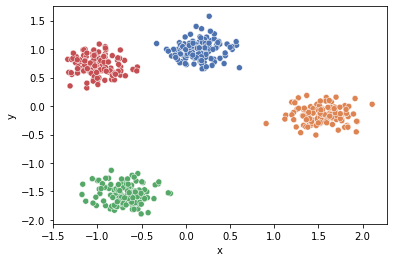









Purity achieved using dummy dataset for Kmeans clustering. =  100.0


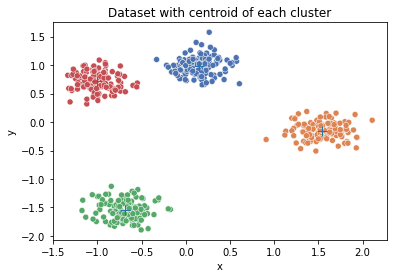

In [2]:

###Checking KMeans function on dummy dataset

import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
centers = 4

#Using make_blobs to create dummy dataset with 4 clusters and 500 sample points. 
X_train, true_labels = make_blobs(n_samples=500, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

#plotting the dummy dataset
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print()
print()
print()
print()
#running Kmeans function on dummy dataset with 4 clusters and 500 datapoints
obj = Kmeans(500 , 4)
centroids , centr_dic = obj.train(X_train , true_labels)

Purity = obj.purity(X_train , true_labels)
print()
print()
print()
print()

#purity id the ratio of count of correctly labeled datapoints to the total number of datapoints in the dataset
print("Purity achieved using dummy dataset for Kmeans clustering. = " , Purity )

#purity of dataset is 100% as all datapoints have been clustered correctly in the dummy dataset.
#print("centr_dic = " , centr_dic )

#plotting calculated centroids and datapoints
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in centroids],
         [y for _, y in centroids],
         '+',
         markersize=10,
         )

plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset with centroid of each cluster")
plt.show()

# **Running KMEANS clustering on MNIST dataset**

In [3]:
# importing MNIST dataset
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('Y_test:  '  + str(test_y.shape))
print()
print()
print()

#Reshaping the 3d array into 2d array
print('X_test:  '  + str(test_X.shape))
train_X = train_X.reshape(60000,784)
test_X = test_X.reshape(10000 , 784)

print()
print()
print()

#Transforming the dataset to have a mean of zero and a unit variance through normalization.

import numpy as np
train_X_norm = (train_X - np.asarray([(np.mean(train_X, 1))]).T)
test_X_norm = (test_X - np.asarray([(np.mean(test_X, 1))]).T)

#print("mean of Normalized matrix = \n {}\n" , np.mean(train_X_norm , 1))

train_X_norm2 = train_X_norm /(np.asarray([(np.std(train_X_norm, 1))]).T)

test_X_norm2 = test_X_norm /(np.asarray([(np.std(test_X_norm, 1))]).T)

#print("Variance of normalized matrix = \n {}\n",np.var(train_X_norm2 ,1))



#For faster calculation with limited RAM and disk memory, we are limiting the dataset to the first 20000 rows by subsetting.

train_X_norm_sub = train_X_norm2[:20000 , :]
#print(train_X_norm2.shape)
#print(train_X_norm_sub.shape)

train_X_norm_sub = test_X_norm2[:5000, : ]
train_y_sub = train_y[:5000]



#Clustering sampled MNIST dataset using kmeans function
obj = Kmeans(1000 , 10)
centroids , centr_dic = obj.train(train_X_norm_sub , train_y)

Purity = obj.purity(X_train , train_y)

print("Purity achived for KMEANS clustering from MNIST dataset = " , Purity)



X_train: (60000, 28, 28)
Y_train: (60000,)
Y_test:  (10000,)



X_test:  (10000, 28, 28)



Purity achived for KMEANS clustering from MNIST dataset =  92.68333333333332


# **Running KMEANS clustering on 20newsGroup dataset**

In [10]:
#Importing 20NG dataset 
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np


from sklearn.datasets import fetch_20newsgroups
newsgroups= fetch_20newsgroups(subset='train')
data= newsgroups.data
labels= newsgroups.target

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
data= vectorizer.fit_transform(data)




In [ ]:
#Taking a subset of the data from faster calculation due to resource constrains
data_20ng = data [ : 5000 , : ] 
labels_20ng = labels[ : 5000]


data_20ng = data_20ng.todense()


In [ ]:
#Clustering sampled 20NG dataset using kmeans function
obj1 = Kmeans(1000 , 20)
centroids , centr_dic = obj1.train(data_20ng , labels_20ng)

Purity = obj.purity(data_20ng , labels_20ng)

print("Purity achived for KMEANS clustering from MNIST dataset = " , Purity)
